<a href="https://colab.research.google.com/github/kovursaisowmya20/machinelearning/blob/main/ML_LSTM_Outlet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install tensorflow_text>=2.0.0rc0

In [ ]:
!pip3 install tf_sentencepiece

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random


# Keras (2.2.4) and tensorflow (1.13).
import tensorflow as tf
import tensorflow_hub as hub
#import tf_sentencepiece

from keras.regularizers import l1, l2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend
from keras import optimizers

#sklearn and imblearn modules:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

#Import SVM
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier


In [ ]:
dataset_df = pd.read_csv('/content/drive/MyDrive/archive1/articles1.csv')

In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [ ]:
dataset_df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [ ]:
#taking 40% of the total dataset
p = 0.4
#import random
random_df = pd.read_csv('/content/drive/MyDrive/archive1/articles1.csv',header=None,skiprows=lambda i: 1>0 and random.random() > p)

In [ ]:
random_df.shape

(19962, 10)

In [ ]:
random_df[3].unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

In [ ]:
label = []
for x in dataset_df['publication']:
  if x == 'Atlantic': label.append(4)
  elif x == 'New York Times': label.append(3)
  elif x == 'Business Insider': label.append(2)
  elif  x == 'Breitbart': label.append(1)
  else: label.append(0)

In [ ]:
dataset_df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [ ]:
dataset_df['label']= label

In [ ]:
dataset_df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,3
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",3
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",3
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",3
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",3


In [ ]:
dataset_df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,3
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",3
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",3
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",3
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",3


In [ ]:
X = dataset_df.drop(['id','title','author','date','year','month','url'],axis=1)
Y = dataset_df['label']

In [ ]:
X.shape

(50000, 4)

In [ ]:
Y.shape

(50000,)

In [ ]:
X['label'].unique()

array([3, 1, 0, 2, 4])

In [ ]:
bias = []
for x in dataset_df['publication']:
  if x == 'Atlantic': bias.append(2)
  elif x == 'New York Times': bias.append(2)
  elif x == 'Business Insider': bias.append(1)
  elif  x == 'Breitbart': bias.append(1)
  else: bias.append(0)

In [ ]:
dataset_df['bias'] = bias

In [ ]:
dataset_df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label,bias
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,3,2
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",3,2
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",3,2
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",3,2
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",3,2


In [ ]:
X = dataset_df.drop(['id','title','author','date','year','month','url'],axis=1)
Y = dataset_df['label']

In [ ]:
X.shape

(50000, 5)

In [ ]:
Y.shape

(50000,)

In [ ]:
dataset_df['label'].unique()

array([3, 1, 0, 2, 4])

In [ ]:
dataset_df['bias'].unique()

array([2, 1, 0])

In [ ]:
label = [1,2,3,4]

#selecting the rows based on condition

result_df = dataset_df[dataset_df['label'].isin(label)]

In [ ]:
result_df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label,bias
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,3,2
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",3,2
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",3,2
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",3,2
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers...",4,2
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...,4,2
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...,4,2
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...,4,2


In [ ]:
result_df['label'].unique()

array([3, 1, 2, 4])

In [ ]:
label = [1,2,3,4]

#selecting the rows based on condition

X_train = X[X['label'].isin(label)]

In [ ]:
X_train['bias'].unique()

array([2, 1])

In [ ]:
X_train.shape

(38512, 5)

In [ ]:
Y = result_df['label']

In [ ]:
Y.shape

(38512,)

In [ ]:
#Training the glove vector
embedding_path = "/content/drive/MyDrive/Glove Dataset/glove.6B.100d.txt" ## change 
# create the word2vec dict from the dictionary
def get_word2vec(file_path):
    file = open(embedding_path, "r")
    if (file):
        word2vec = dict()
        split = file.read().splitlines()
        for line in split:
            key = line.split(' ',1)[0] # the first word is the key
            value = np.array([float(val) for val in line.split(' ')[1:]])
            word2vec[key] = value
        return (word2vec)
    else:
        print("invalid file path")
w2v = get_word2vec(embedding_path)

In [ ]:
news_atlantic = result_df[result_df['publication'] == 'Atlantic']
news_business_insider = result_df[result_df['publication'] == 'Business Insider']
n_s_breit = result_df[result_df['publication'] == 'Breitbart']
n_s_newyorkt = result_df[result_df['publication'] == 'New York Times']

In [ ]:
one_big_array = list(news_atlantic.iloc[:,9].values) + list(news_business_insider.iloc[:,9].values) \
 + list(n_s_breit.iloc[:,9].values) + list(n_s_newyorkt.iloc[:,9].values)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
#tknzr = word_tokenize()
def get_tokens(one_big_array):
    tokens = nltk.word_tokenize(one_big_array)
    tokens = [token for token in tokens if (token not in stopwords and len(token) > 1)]
    tokens = [get_lemma(token) for token in tokens]
    return (tokens)
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
token_list = (result_df['content'].apply(get_tokens))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_new = result_df['label']
Y_new = le.fit_transform(Y_new)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# prepare tokenizer
max_len = 60
t = Tokenizer()
t.fit_on_texts(token_list)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(one_big_array)
# pad documents to a max length of 4 words
max_length = max_len
X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
y = Y_new

In [ ]:
# get the embedding matrix from the embedding layer
from numpy import zeros
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
 embedding_vector = w2v.get(word)
 if embedding_vector is not None:
  embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix)

[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.091682  0.58105   0.40477  ... -0.38741   0.34695   0.229   ]
 [-0.038194 -0.24487   0.72812  ... -0.1459    0.8278    0.27062 ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.14539  -0.0216   -0.72012  ... -0.017936 -0.72469   0.050731]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


In [ ]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(one_big_array)
# pad documents to a max length of 4 words
max_length = max_len
X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
print(vocab_size)

151768


In [ ]:
# main model
input = keras.Input(shape=(max_len,), dtype="int32")
model = layers.Embedding(vocab_size,100,weights=[embedding_matrix],input_length=max_len)(input)
model = layers.LSTM (100,return_sequences=True,dropout=0.50)(model)
model = layers.TimeDistributed(Dense(100,activation='relu'))(model)
model = layers.Flatten()(model)
model = Dense(100,activation='relu')(model)
output = Dense(4,activation='softmax')(model)
model = keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
X.shape

(38512, 60)

In [ ]:
Y.shape

(38512,)

In [ ]:
#Splitting the value into X training set and Y training set
from sklearn.model_selection import train_test_split
X_train_data,X_test, Y_train_data, Y_test =  train_test_split(X, y,test_size =0.20,random_state= 4 )

In [ ]:
print(X_train_data)

[[  699  5489  1127 ...   153     0     0]
 [  276  1217  3211 ...   154   188    24]
 [   73   911   708 ...  4399  1145   519]
 ...
 [   73  1065   861 ...  1087  3785  8690]
 [   74  2197   421 ...   194   264  1799]
 [    2    42 10396 ... 13544   986  1155]]


In [ ]:
print(Y_train_data)

[2 2 1 ... 0 0 0]


In [ ]:
type(X_train_data)

numpy.ndarray

In [ ]:
type(Y_train_data)

numpy.ndarray

In [ ]:
m_h=model.fit(X_train_data,Y_train_data,validation_split=0.25, epochs = 10, verbose = 2)

Epoch 1/10
723/723 - 183s - loss: 0.6727 - accuracy: 0.7192 - val_loss: 0.5727 - val_accuracy: 0.7846
Epoch 2/10
723/723 - 177s - loss: 0.5231 - accuracy: 0.7982 - val_loss: 0.5332 - val_accuracy: 0.7993
Epoch 3/10
723/723 - 175s - loss: 0.4492 - accuracy: 0.8303 - val_loss: 0.5332 - val_accuracy: 0.7979
Epoch 4/10
723/723 - 176s - loss: 0.3826 - accuracy: 0.8583 - val_loss: 0.5286 - val_accuracy: 0.8044
Epoch 5/10
723/723 - 167s - loss: 0.3182 - accuracy: 0.8869 - val_loss: 0.5632 - val_accuracy: 0.8031
Epoch 6/10
723/723 - 156s - loss: 0.2611 - accuracy: 0.9067 - val_loss: 0.6105 - val_accuracy: 0.7994
Epoch 7/10
723/723 - 174s - loss: 0.2113 - accuracy: 0.9241 - val_loss: 0.6453 - val_accuracy: 0.7967
Epoch 8/10
723/723 - 169s - loss: 0.1722 - accuracy: 0.9373 - val_loss: 0.7263 - val_accuracy: 0.7871
Epoch 9/10
723/723 - 172s - loss: 0.1402 - accuracy: 0.9501 - val_loss: 0.8086 - val_accuracy: 0.7810
Epoch 10/10
723/723 - 172s - loss: 0.1175 - accuracy: 0.9585 - val_loss: 0.9016 - 

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
print('Accuracy: %f' % (accuracy*100))

241/241 - 4s - loss: 0.9162 - accuracy: 0.7887
Accuracy: 78.865379


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4731
           1       0.67      0.76      0.71      1384
           2       0.68      0.62      0.65      1553
           3       0.00      0.00      0.00        35

    accuracy                           0.79      7703
   macro avg       0.55      0.56      0.56      7703
weighted avg       0.79      0.79      0.79      7703
 



In [ ]:
print(m_h.history['accuracy'])

[0.7192071080207825, 0.798234224319458, 0.8302605152130127, 0.8582619428634644, 0.8868691921234131, 0.9066908955574036, 0.9240889549255371, 0.9372889995574951, 0.950099527835846, 0.9584956169128418]


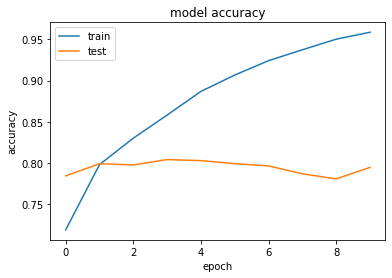

In [ ]:
plt.plot(m_h.history['accuracy'])
plt.plot(m_h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

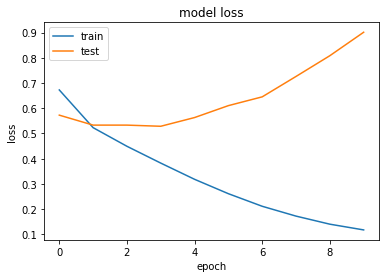

In [ ]:
# summarize history for loss
plt.plot(m_h.history['loss'])
plt.plot(m_h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Implementing Logistic Regression
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_data, Y_train_data)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train_data, Y_train_data) * 100, 2)
acc_log

61.66

In [ ]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train_data, Y_train_data)
Y_predSVM = svc.predict(X_test)
acc_svc = round(svc.score(X_train_data, Y_train_data) * 100, 2)
acc_svc

64.64

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_data, Y_train_data)
Y_predKNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train_data, Y_train_data) * 100, 2)
acc_knn

71.41

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_data, Y_train_data)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train_data, Y_train_data) * 100, 2)
acc_gaussian

48.64

In [ ]:
# Linear SVC

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train_data, Y_train_data)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train_data, Y_train_data) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


41.33

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train_data, Y_train_data)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train_data, Y_train_data) * 100, 2)
acc_sgd

41.86

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Naive Bayes',  
              'Stochastic Gradient Decent', 'Linear SVC'],
    'Score': [acc_svc, acc_knn, acc_log, 
               acc_gaussian, 
              acc_sgd, acc_linear_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,71.41
0,Support Vector Machines,64.64
2,Logistic Regression,61.66
3,Naive Bayes,48.64
4,Stochastic Gradient Decent,41.86
5,Linear SVC,41.33
